# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
# подключим необходимые библиотеки

import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline

### 1. Подберите скорость обучения (alpha) и количество итераций для градиентного спуска.

In [5]:
# Вспомогательные функции для расчета ошибки

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_gr(X, y, w, alpha, n):
  plx = []
  ply = []
  plw = []
  wpl = copy.deepcopy(w)
  phi = 1000 if n > 100000 else 100
  
  print("============================================================================")
  for i in range(n):
    y_pred = np.dot(wpl, X)
    err = calc_mse(y, y_pred)
    wpl -= 2 * alpha * np.dot(X, (y_pred - y)) / y.shape[0]

    if i % phi == 0:
      plx.append(i)
      ply.append(err)
      plw.append(wpl)
      print(i, err, wpl)

  return plx, ply, plw

In [6]:
X_calc = np.array([[1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y_calc = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

# Рассчитаем аналитически значения, для проверки решения градиентного спуска
X_calc = X_calc.reshape(10, 1)
X_calc = np.hstack([np.ones((10, 1)), X_calc])
B = np.dot(np.linalg.inv(np.dot(X_calc.T,X_calc)), X_calc.T@y_calc)
B

array([47.23214286,  3.91071429])

0 3173.15 [1.0001102 0.50034  ]
1000 3049.1186355902123 [1.1093247  0.83513666]
2000 2932.22519770915 [1.21660836 1.15974375]
3000 2822.0521007823713 [1.32201719 1.47446426]
4000 2718.2062033527454 [1.42560552 1.77959218]
5000 2620.317377170514 [1.52742609 2.07541274]
6000 2528.0371600460408 [1.62753004 2.36220274]
7000 2441.0374875619214 [1.72596702 2.64023072]
8000 2359.009499028204 [1.82278521 2.90975726]
9000 2281.6624133346677 [1.91803132 3.17103519]
10000 2208.7224706085026 [2.01175073 3.42430983]
11000 2139.9319358253015 [2.10398743 3.66981921]
12000 2075.0481607467223 [2.19478412 3.90779428]
13000 2013.8427007704734 [2.28418223 4.13845915]
14000 1956.1004834782107 [2.37222197 4.36203125]
15000 1901.619025854971 [2.45894235 4.57872157]
16000 1850.2076973311146 [2.54438121 4.7887348 ]
17000 1801.687025964302 [2.62857529 4.99226958]
18000 1755.8880452362614 [2.71156022 5.18951863]
19000 1712.6516790867722 [2.79337058 5.38066896]
20000 1671.8281629465796 [2.87403993 5.565902  ]
210

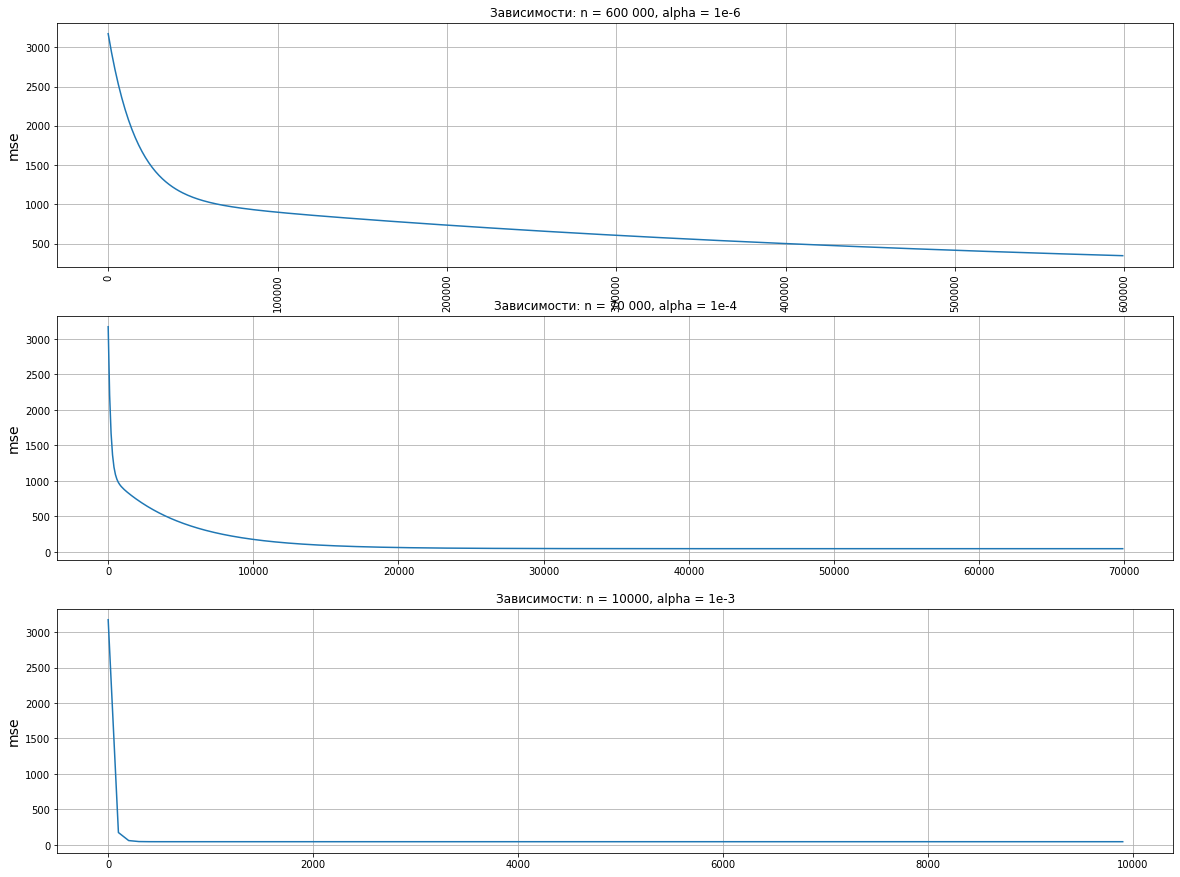

In [7]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

w = np.array([1, 0.5])

pl_x, pl_y, plw = calc_gr(X, y, w, 1e-6, 600000)

plt.figure(figsize=(20, 20))
plt.subplots_adjust(bottom=0.1)
plt.subplot(4, 1, 1)

plt.plot(pl_x, pl_y)
plt.title("Зависимости: n = 600 000, alpha = 1e-6")
plt.ylabel("mse", fontsize=14)
plt.grid(True)
plt.xticks(rotation='vertical')

pl_x2, pl_y2, plw2 = calc_gr(X, y, w, 1e-4, 70000)

plt.subplot(4, 1, 2)
plt.plot(pl_x2, pl_y2)
plt.title("Зависимости: n = 70 000, alpha = 1e-4")
plt.ylabel("mse", fontsize=14)
plt.grid(True)

pl_x3, pl_y3, plw3 = calc_gr(X, y, w, 1e-2, 10000)

plt.subplot(4, 1, 3)
plt.plot(pl_x3, pl_y3)
plt.title("Зависимости: n = 10000, alpha = 1e-3")
plt.ylabel("mse", fontsize=14)
plt.grid(True)

Из графиков видно, что чем меньше $\alpha$, тем дольше сходимость - функция ошибки дольше выходит на плато. В виду этого, в зависимости от требуемой точности, можно либо увеличвать $\alpha$ и уменьшать количесво итераций для большей скорости, либо уменьшать $\alpha$ и увеличивать число итераций.

### 2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [ ]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  # W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
  # Правильный вариант
  W -= 2 * alpha * np.dot(X, (y_pred - y)) / y.shape[0]
  if i % 100 == 0:
    print(i, W, err)

**Объяснение.** X и W в контексте задачи являются уже векторами, в отличие от предыдущего варината, где расчитывается каждый элемент вектора W отдельно. А значит использовать обычное умножение здесь неуместно.